In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid",palette="deep")

In [2]:
Transpose = pd.read_csv("Transpose_Results.csv", sep = ';')
Transpose = Transpose.dropna(how = "all")
T1 = Transpose[2:25]
T2 = Transpose[26:49]

In [3]:
#Runtimes
T_runtime = Transpose[Transpose["Metric"] == "Run Time"]
cpu_run = T_runtime[T_runtime["Type"] == "CPU"].Values.to_numpy()
glob_GPU_run = T_runtime[T_runtime["Type"] == "GPU(Global)"].Values.to_numpy()
share_32_8_GPU_run = T_runtime[T_runtime["Type"] == "GPU (Shared) tile size = 32, block size = 8"].Values.to_numpy()
share_32_16_GPU_run = T_runtime[T_runtime["Type"] == "GPU (Shared) tile size = 32, block size = 16"].Values.to_numpy()
share_64_8_GPU_run = T_runtime[T_runtime["Type"] == "GPU (Shared) tile size = 64, block size = 8"].Values.to_numpy()
share_64_16_GPU_run = T_runtime[T_runtime["Type"] == "GPU (Shared) tile size = 64, block size = 16"].Values.to_numpy()


#Speed up
T_speedup = Transpose[Transpose["Metric"] == "Speed Up"]
glob_GPU_sped = T_speedup[T_speedup["Type"] == "GPU(Global)"].Values.to_numpy()
share_32_8_GPU_sped = T_speedup[T_speedup["Type"] == "GPU (Shared) tile size = 32, block size = 8"].Values.to_numpy()
share_32_16_GPU_sped = T_speedup[T_speedup["Type"] == "GPU (Shared) tile size = 32, block size = 16"].Values.to_numpy()
share_64_8_GPU_sped = T_speedup[T_speedup["Type"] == "GPU (Shared) tile size = 64, block size = 8"].Values.to_numpy()
share_64_16_GPU_sped = T_speedup[T_speedup["Type"] == "GPU (Shared) tile size = 64, block size = 16"].Values.to_numpy()

#Speed up
T_flop = Transpose[Transpose["Metric"] == "Throughputs"]
cpu_flop = T_flop[T_flop["Type"] == "CPU"].Values.to_numpy()
glob_GPU_flop = T_flop[T_flop["Type"] == "GPU(Global)"].Values.to_numpy()
share_32_8_GPU_flop = T_flop[T_flop["Type"] == "GPU (Shared) tile size = 32, block size = 8"].Values.to_numpy()
share_32_16_GPU_flop = T_flop[T_flop["Type"] == "GPU (Shared) tile size = 32, block size = 16"].Values.to_numpy()
share_64_8_GPU_flop = T_flop[T_flop["Type"] == "GPU (Shared) tile size = 64, block size = 8"].Values.to_numpy()
share_64_16_GPU_flop = T_flop[T_flop["Type"] == "GPU (Shared) tile size = 64, block size = 16"].Values.to_numpy()
display(T_flop)

print(glob_GPU_flop)

,Type,Metric,Values
4,CPU,Throughputs,0.039563
8,GPU(Global),Throughputs,1.329235
13,"GPU (Shared) tile size = 32, block size = 8",Throughputs,6.954160
19,"GPU (Shared) tile size = 32, block size = 16",Throughputs,6.681892
24,"GPU (Shared) tile size = 64, block size = 8",Throughputs,4.533481
29,"GPU (Shared) tile size = 64, block size = 16",Throughputs,4.291252
35,CPU,Throughputs,0.027952
39,GPU(Global),Throughputs,3.130034
44,"GPU (Shared) tile size = 32, block size = 8",Throughputs,9.465049
49,"GPU (Shared) tile size = 32, block size = 16",Throughputs,8.761497


[1.3292346  3.1300339  4.36531212 3.58835585]


In [4]:
n = np.zeros(4)
for i in range(4):
    n[i] = 2**(9+i)

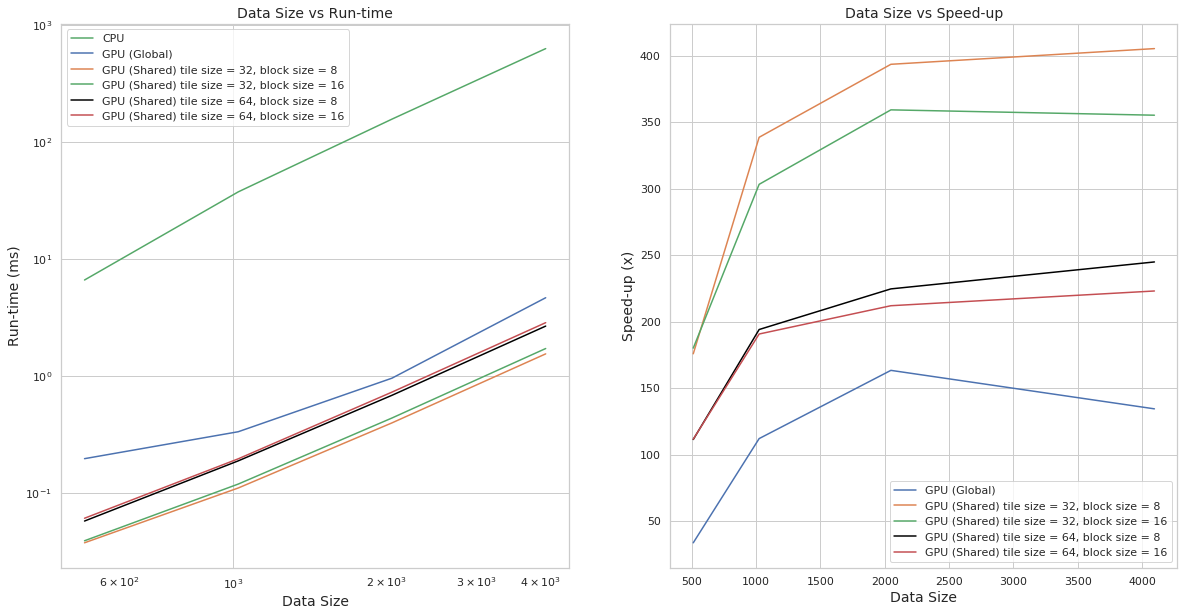

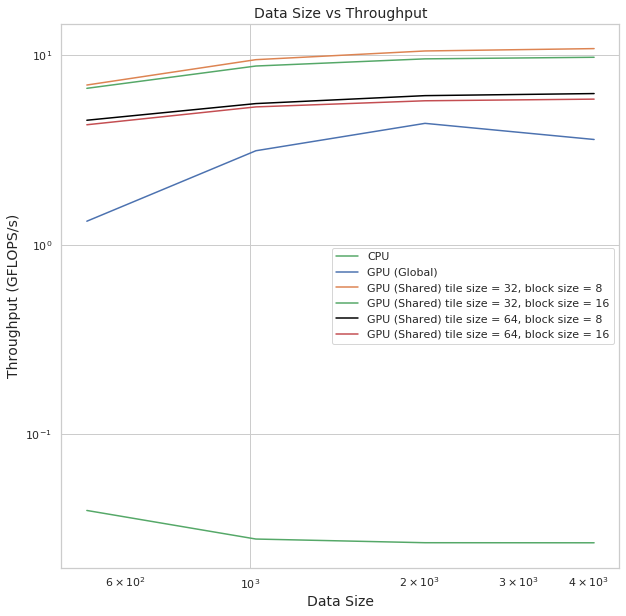

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols= 2, figsize = (20,10))

#Runtime
ax1.set_title("Data Size vs Run-time",fontsize = 14)
ax1.set_xlabel("Data Size", fontsize = 14)
ax1.set_ylabel("Run-time (ms)", fontsize = 14)

ax1.loglog(n,cpu_run, label = "CPU", color = 'g')
ax1.loglog(n,glob_GPU_run, label = "GPU (Global)")
ax1.loglog(n,share_32_8_GPU_run, label = "GPU (Shared) tile size = 32, block size = 8")
ax1.loglog(n,share_32_16_GPU_run, label = "GPU (Shared) tile size = 32, block size = 16")
ax1.loglog(n,share_64_8_GPU_run, label = "GPU (Shared) tile size = 64, block size = 8", color = "Black")
ax1.loglog(n,share_64_16_GPU_run, label = "GPU (Shared) tile size = 64, block size = 16")
ax1.legend()

#Speed Up
ax2.set_title("Data Size vs Speed-up",fontsize = 14)
ax2.set_xlabel("Data Size", fontsize = 14)
ax2.set_ylabel("Speed-up (x)", fontsize = 14)

ax2.plot(n,glob_GPU_sped, label = "GPU (Global)")
ax2.plot(n,share_32_8_GPU_sped, label = "GPU (Shared) tile size = 32, block size = 8")
ax2.plot(n,share_32_16_GPU_sped, label = "GPU (Shared) tile size = 32, block size = 16")
ax2.plot(n,share_64_8_GPU_sped, label = "GPU (Shared) tile size = 64, block size = 8", color = "Black")
ax2.plot(n,share_64_16_GPU_sped, label = "GPU (Shared) tile size = 64, block size = 16")
ax2.legend()

#Throughput
fig, ax3 = plt.subplots(figsize = (10,10))
ax3.loglog(n,cpu_flop, label = "CPU", color = 'g')
ax3.set_title("Data Size vs Throughput", fontsize = 14)
ax3.set_xlabel("Data Size", fontsize = 14)
ax3.set_ylabel("Throughput (GFLOPS/s)", fontsize = 14)

ax3.loglog(n,glob_GPU_flop, label = "GPU (Global)")
ax3.loglog(n,share_32_8_GPU_flop, label = "GPU (Shared) tile size = 32, block size = 8")
ax3.loglog(n,share_32_16_GPU_flop, label = "GPU (Shared) tile size = 32, block size = 16")
ax3.loglog(n,share_64_8_GPU_flop, label = "GPU (Shared) tile size = 64, block size = 8", color = "Black")
ax3.loglog(n,share_64_16_GPU_flop, label = "GPU (Shared) tile size = 64, block size = 16")
ax3.legend()

plt.show()

### Vector Add

In [6]:
Vec = pd.read_csv("VecAdd_Results.csv", sep = ';')
Vec = Vec.dropna(how = "all")

In [7]:
#Runtimes
Vec_runtime = Vec[Vec["Metric"] == "Run Time"]
v_cpu_run = Vec_runtime[Vec_runtime["Type"] == "CPU"].Values.to_numpy()
glob_256_GPU_run = Vec_runtime[Vec_runtime["Type"] == "GPU(Global) 256"].Values.to_numpy()
glob_512_GPU_run = Vec_runtime[Vec_runtime["Type"] == "GPU(Global) 512"].Values.to_numpy()
share_256_GPU_run = Vec_runtime[Vec_runtime["Type"] == "GPU(Shared) Tile Size = 256"].Values.to_numpy()
share_512_GPU_run = Vec_runtime[Vec_runtime["Type"] == "GPU(Shared) Tile Size = 512"].Values.to_numpy()

#Speed up
Vec_sped = Vec[Vec["Metric"] == "Speed Up"]
glob_256_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Global) 256"].Values.to_numpy()
glob_512_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Global) 512"].Values.to_numpy()
share_256_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Shared) Tile Size = 256"].Values.to_numpy()
share_512_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Shared) Tile Size = 512"].Values.to_numpy()

# #Flops
Vec_flop = Vec[Vec["Metric"] == "Throughputs"]
v_cpu_flop = Vec_flop[Vec_flop["Type"] == "CPU"].Values.to_numpy()
glob_256_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Global) 256"].Values.to_numpy()
glob_512_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Global) 512"].Values.to_numpy()
share_256_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Shared) Tile Size = 256"].Values.to_numpy()
share_512_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Shared) Tile Size = 512"].Values.to_numpy()

display(Vec_sped)
glob_256_GPU_sped

,Type,Metric,Values
2,CPU,Speed Up,1.000000
8,GPU(Shared) Tile Size = 256,Speed Up,0.633141
13,GPU(Global) 256,Speed Up,0.888889
20,GPU(Shared) Tile Size = 512,Speed Up,0.574335
25,GPU(Global) 512,Speed Up,0.639930
30,CPU,Speed Up,1.000000
36,GPU(Shared) Tile Size = 256,Speed Up,0.734778
41,GPU(Global) 256,Speed Up,1.460063
48,GPU(Shared) Tile Size = 512,Speed Up,0.575818
53,GPU(Global) 512,Speed Up,1.604467


array([0.888889, 1.460063, 2.56153 , 3.834473, 3.38739 ])

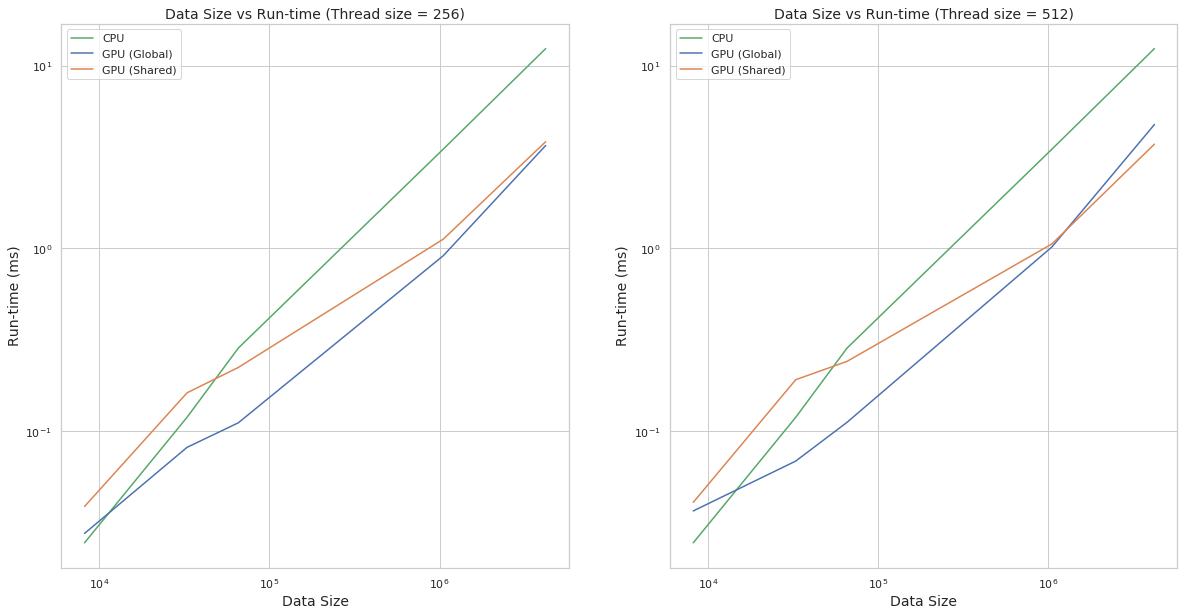

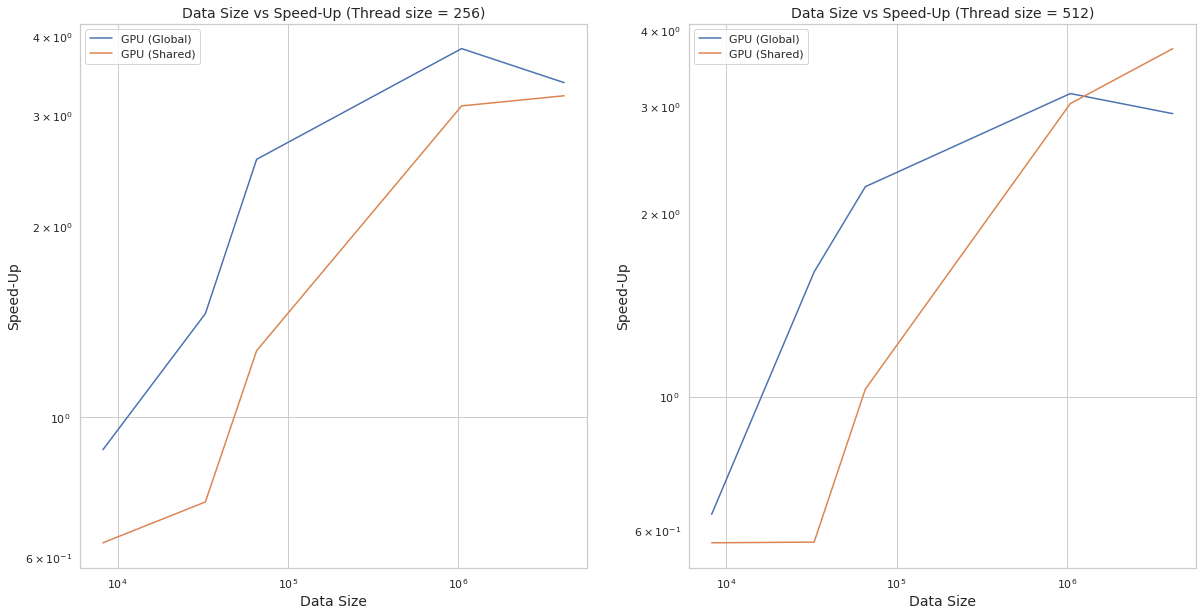

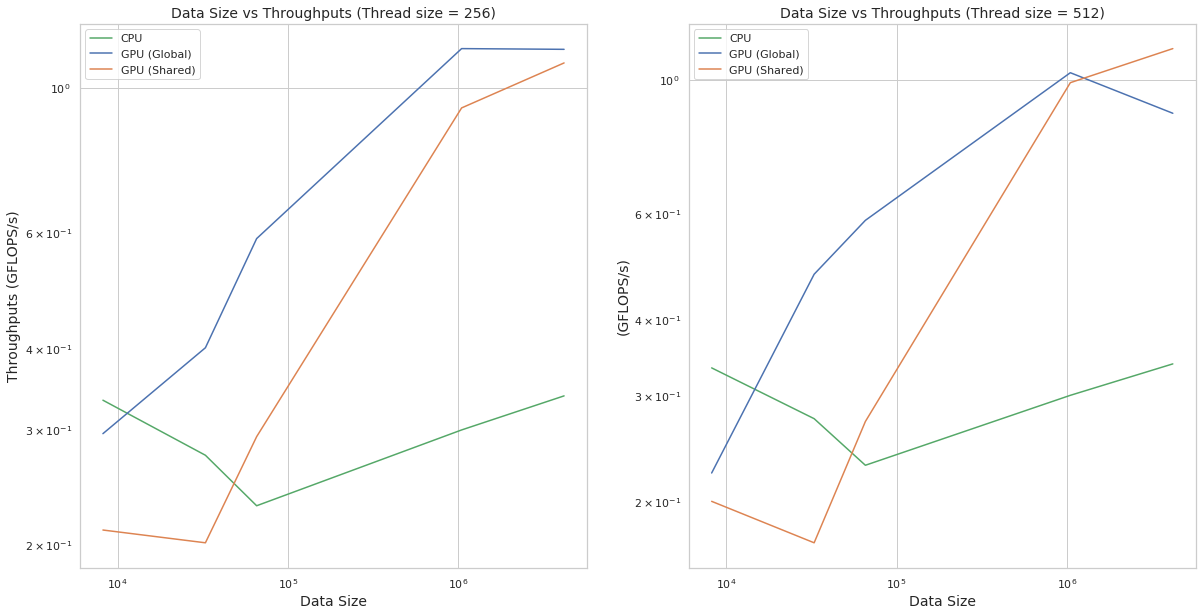

In [8]:
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols= 2, figsize = (20,10))

n2 = np.array([8192, 32768, 65536, 1048576, 4194304])

#Runtime 256
ax1.set_title("Data Size vs Run-time (Thread size = 256)",fontsize = 14)
ax1.set_xlabel("Data Size", fontsize = 14)
ax1.set_ylabel("Run-time (ms)", fontsize = 14)

ax1.loglog(n2,v_cpu_run, label = "CPU", color = 'g')
ax1.loglog(n2,glob_256_GPU_run, label = "GPU (Global)")
ax1.loglog(n2,share_256_GPU_run, label = "GPU (Shared)")

ax1.legend()

#Runtime 512
ax2.set_title("Data Size vs Run-time (Thread size = 512)",fontsize = 14)
ax2.set_xlabel("Data Size", fontsize = 14)
ax2.set_ylabel("Run-time (ms)", fontsize = 14)


ax2.loglog(n2,v_cpu_run, label = "CPU", color = 'g')
ax2.loglog(n2,glob_512_GPU_run, label = "GPU (Global)")
ax2.loglog(n2,share_512_GPU_run, label = "GPU (Shared)")

ax2.legend()

plt.show()
# #Speed Up
fig2, (ax3,ax4) = plt.subplots(nrows=1, ncols= 2, figsize = (20,10))

# 256
ax3.set_title("Data Size vs Speed-Up (Thread size = 256)",fontsize = 14)
ax3.set_xlabel("Data Size", fontsize = 14)
ax3.set_ylabel("Speed-Up", fontsize = 14)


ax3.loglog(n2,glob_256_GPU_sped, label = "GPU (Global)")
ax3.loglog(n2,share_256_GPU_sped, label = "GPU (Shared)")

ax3.legend()

# 512
ax4.set_title("Data Size vs Speed-Up (Thread size = 512)",fontsize = 14)
ax4.set_xlabel("Data Size", fontsize = 14)
ax4.set_ylabel("Speed-Up", fontsize = 14)

ax4.loglog(n2,glob_512_GPU_sped, label = "GPU (Global)")
ax4.loglog(n2,share_512_GPU_sped, label = "GPU (Shared)")

ax4.legend()
plt.show()

# #Throughput
fig, (ax5,ax6) = plt.subplots(nrows=1, ncols= 2, figsize = (20,10))

#Runtime 256
ax5.set_title("Data Size vs Throughputs (Thread size = 256)",fontsize = 14)
ax5.set_xlabel("Data Size", fontsize = 14)
ax5.set_ylabel("Throughputs (GFLOPS/s)", fontsize = 14)

ax5.loglog(n2,v_cpu_flop, label = "CPU", color = 'g')
ax5.loglog(n2,glob_256_GPU_flop, label = "GPU (Global)")
ax5.loglog(n2,share_256_GPU_flop, label = "GPU (Shared)")

ax5.legend()

#Runtime 512
ax6.set_title("Data Size vs Throughputs (Thread size = 512)",fontsize = 14)
ax6.set_xlabel("Data Size", fontsize = 14)
ax6.set_ylabel("(GFLOPS/s)", fontsize = 14)


ax6.loglog(n2,v_cpu_flop, label = "CPU", color = 'g')
ax6.loglog(n2,glob_512_GPU_flop, label = "GPU (Global)")
ax6.loglog(n2,share_512_GPU_flop, label = "GPU (Shared)")

ax6.legend()
plt.show()

#### Matrix Mul

In [13]:
Mat = pd.read_csv("Matrixmul_Results.csv", sep = ';')
Mat = Mat.dropna(how = "all")
Mat

,Type,Column2,Column3
0,-------------------N = 512----------------,NaN,NaN
1,CPU,Run Time,"1421,973389"
2,CPU,Speed Up,1
3,CPU,Throughputs,"0,000001"
5,GPU(Shared) Tile Size = 16,Run Time,"1,557024"
6,GPU(Shared) Tile Size = 16,Speed Up,"895,672974"
7,GPU(Shared) Tile Size = 16,Throughputs,"0,000658"
8,GPU(Shared) Tile Size = 16,Ratio of Throughputs,"895,673004"
10,GPU(Shared) Tile Size = 32,Run Time,"1,251712"
11,GPU(Shared) Tile Size = 32,Speed Up,"1136,022827"


In [23]:
#Runtimes
Mat_runtime = Mat[Mat["Column2"] == " Run Time"]
m_cpu_run = Mat_runtime[Mat_runtime["Type"] == "CPU"].Column3.to_numpy()
share_16_GPU_run = Mat_runtime[Mat_runtime["Type"] == "GPU(Shared) Tile Size = 16"].Column3.to_numpy()
share_32_GPU_run = Mat_runtime[Mat_runtime["Type"] == "GPU(Shared) Tile Size = 32"].Column3.to_numpy()

# #Speed up
# Vec_sped = Vec[Vec["Metric"] == "Speed Up"]
# glob_256_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Global) 256"].Values.to_numpy()
# glob_512_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Global) 512"].Values.to_numpy()
# share_256_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Shared) Tile Size = 256"].Values.to_numpy()
# share_512_GPU_sped = Vec_sped[Vec_sped["Type"] == "GPU(Shared) Tile Size = 512"].Values.to_numpy()

# # #Flops
# Vec_flop = Vec[Vec["Metric"] == "Throughputs"]
# v_cpu_flop = Vec_flop[Vec_flop["Type"] == "CPU"].Values.to_numpy()
# glob_256_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Global) 256"].Values.to_numpy()
# glob_512_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Global) 512"].Values.to_numpy()
# share_256_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Shared) Tile Size = 256"].Values.to_numpy()
# share_512_GPU_flop = Vec_flop[Vec_flop["Type"] == "GPU(Shared) Tile Size = 512"].Values.to_numpy()

display(Mat_runtime)
share_16_GPU_run

,Type,Column2,Column3
1,CPU,Run Time,"1421,973389"
5,GPU(Shared) Tile Size = 16,Run Time,"1,557024"
10,GPU(Shared) Tile Size = 32,Run Time,"1,251712"
16,CPU,Run Time,"12771,99414"
20,GPU(Shared) Tile Size = 16,Run Time,"11,54304"
25,GPU(Shared) Tile Size = 32,Run Time,"8,769728"
31,CPU,Run Time,"117587,5859"
35,GPU(Shared) Tile Size = 16,Run Time,"90,507683"
40,GPU(Shared) Tile Size = 32,Run Time,"68,837181"
46,CPU,Run Time,"2113389,75"


array(['1,557024', '11,54304', '90,507683', '631,83783'], dtype=object)

/home/marc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


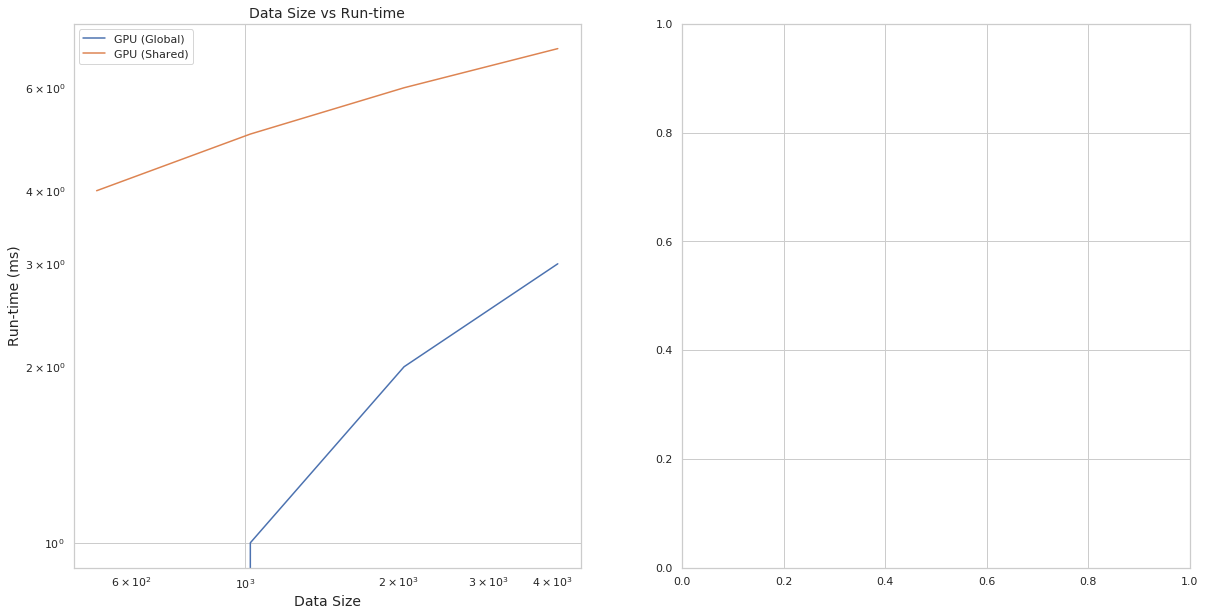

In [25]:
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols= 2, figsize = (20,10))

#Runtime 256
ax1.set_title("Data Size vs Run-time",fontsize = 14)
ax1.set_xlabel("Data Size", fontsize = 14)
ax1.set_ylabel("Run-time (ms)", fontsize = 14)

ax1.loglog(n,share_16_GPU_run, label = "GPU (Global)")
ax1.loglog(n,share_32_GPU_run, label = "GPU (Shared)")

ax1.legend()

# ax2.set_title("Data Size vs Run-time (Thread size = 512)",fontsize = 14)
# ax2.set_xlabel("Data Size", fontsize = 14)
# ax2.set_ylabel("Run-time (ms)", fontsize = 14)


# ax2.loglog(n2,v_cpu_run, label = "CPU", color = 'g')
# ax2.loglog(n2,glob_512_GPU_run, label = "GPU (Global)")
# ax2.loglog(n2,share_512_GPU_run, label = "GPU (Shared)")

# ax2.legend()

plt.show()